# Monday, July 27, 2020


# Part  (a)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# cannot connect to ics.uci.edu. 
#     used alternative source with the same data, but in txt file and with fixed Bare Nuclei column
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/
            #   breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv("datasets/data.txt")
data.head()

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [10]:
data.columns = [
    "ID", 
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
data.sample(5)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
448,1193544,5,7,9,8,6,10,8,10,1,4
397,1196475,3,2,1,1,2,1,2,2,1,2
34,1079304,2,1,1,1,2,1,2,1,1,2
440,677910,5,2,2,4,2,4,1,1,1,2
233,1236043,3,3,2,1,3,1,3,6,1,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   ID                           698 non-null    int64
 1   Clump Thickness              698 non-null    int64
 2   Uniformity of Cell Size      698 non-null    int64
 3   Uniformity of Cell Shape     698 non-null    int64
 4   Marginal Adhesion            698 non-null    int64
 5   Single Epithelial Cell Size  698 non-null    int64
 6   Bare Nuclei                  698 non-null    int64
 7   Bland Chromatin              698 non-null    int64
 8   Normal Nucleoli              698 non-null    int64
 9   Mitoses                      698 non-null    int64
 10  Class                        698 non-null    int64
dtypes: int64(11)
memory usage: 60.1 KB


In [12]:
data["Bare Nuclei"].value_counts() 
# in this dataset, there are 16 '0' instead of 16 '?', comparing to the UCI data file. 
# assume it is correct and there are some 0 values for Bare Nuclei. 
# it is always better to clarify what it is and clean this data

1     401
10    132
5      30
2      30
3      28
8      21
4      19
0      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [13]:
# change 4 to 1 and 2 to 0 in class column
data['Class'].replace(4, 1, inplace=True)
data['Class'].replace(2, 0, inplace=True)

data.drop(['ID'], axis=1, inplace=True)
data.sample(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
100,2,3,4,4,2,5,2,5,1,1
496,4,2,1,1,2,1,1,1,1,0
244,5,1,1,2,2,2,3,1,1,0
529,7,4,4,3,4,10,6,9,1,1
332,5,4,6,6,4,10,4,3,1,1


In [14]:
columns_list = list(data.drop(['Class'], axis=1).columns) 
# eliminate Class column as it is going to be our Y, and the rest will be our X

columns_list

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

In [15]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.467049,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,3.642122,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [16]:
for i in columns_list: # how the feature list loop works
    print(columns_list.index(i), i)

0 Clump Thickness
1 Uniformity of Cell Size
2 Uniformity of Cell Shape
3 Marginal Adhesion
4 Single Epithelial Cell Size
5 Bare Nuclei
6 Bland Chromatin
7 Normal Nucleoli
8 Mitoses


In [17]:
data.sample(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
304,10,8,4,4,4,10,3,10,4,1
177,4,1,1,1,2,1,3,1,1,0
124,1,1,1,1,2,1,2,1,1,0
532,3,1,1,1,2,1,2,1,1,0
300,1,1,1,1,2,1,3,1,1,0


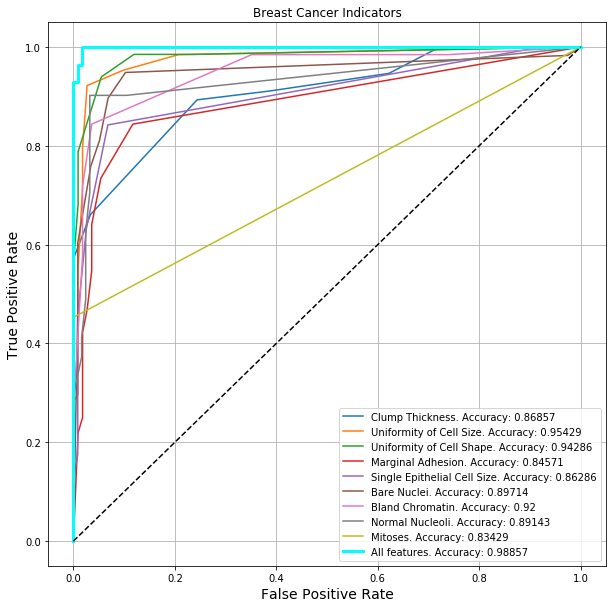

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score

# fit model for each column
for i in columns_list:
    
    model = LogisticRegression()
    
    x_train, x_test, y_train, y_test = train_test_split(np.array(data[i]).reshape(-1,1), data["Class"])
    model.fit(x_train, y_train)
    y_scores = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, y_scores.round())
    FPR, TPR, _ = roc_curve(y_test, y_scores)
    
    plt.plot(FPR, TPR, label = str(columns_list[columns_list.index(i)]) + ". Accuracy: " + str(round(accuracy,5)))

# another plot to fit all features together

model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(np.array(data), data["Class"])
model.fit(x_train, y_train) 
y_scores = model.predict_proba(x_test)[:,1]
accuracy = accuracy_score(y_test, y_scores.round())
FPR, TPR, _ = roc_curve(y_test, y_scores)
plt.plot(FPR, TPR, c="cyan", linewidth=3, label = "All features" + ". Accuracy: " + str(round(accuracy,5)))


plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("Breast Cancer Indicators")
plt.legend()
plt.gcf().set_size_inches(10,10)


# Part  (b)
# Lecture practice

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

redfin_data = pd.read_csv("redfin.csv")
redfin_data.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,470 19th St,Santa Monica,CA,90402,5690000,5.0,6.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Santa-Monica/470-19th...,CRMLS,PW20143609,N,Y,34.038695,-118.494311
1,MLS Listing,NaN,Single Family Residential,801 Stanford St,Santa Monica,CA,90403,3749000,2.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Santa-Monica/801-Stan...,CRMLS,BB20129635,N,Y,34.044506,-118.479619
2,MLS Listing,NaN,Condo/Co-op,1319 11th St #5,Santa Monica,CA,90401,649000,1.0,1.0,...,Active,NaN,NaN,http://www.redfin.com/CA/Santa-Monica/1319-11t...,TheMLS,20-586222,N,Y,34.022926,-118.489348
3,MLS Listing,NaN,Condo/Co-op,848 Lincoln Blvd Unit A,Santa Monica,CA,90403,1299000,2.0,2.5,...,Active,NaN,NaN,http://www.redfin.com/CA/Santa-Monica/848-Linc...,TheMLS,20-565224,N,Y,34.026306,-118.499872
4,PAST SALE,July-10-2020,Condo/Co-op,2721 2nd St #212,Santa Monica,CA,90405,669000,1.0,1.0,...,Sold,NaN,NaN,http://www.redfin.com/CA/Santa-Monica/2721-2nd...,TheMLS,20-582852,N,Y,34.001021,-118.481070


In [2]:
np.array(redfin_data.columns)

array(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'ADDRESS', 'CITY',
       'STATE OR PROVINCE', 'ZIP OR POSTAL CODE', 'PRICE', 'BEDS',
       'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT',
       'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
       'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
       'SOURCE', 'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE',
       'LONGITUDE'], dtype=object)

In [3]:
redfin_data.columns = [name.lower() for name in redfin_data.columns]
redfin_data.shape

(350, 27)

In [4]:
df = redfin_data[['property type', 'price','beds','baths','square feet','lot size','year built','days on market','$/square feet','hoa/month', 'status','latitude','longitude']]
df.head()

,property type,price,beds,baths,square feet,lot size,year built,days on market,$/square feet,hoa/month,status,latitude,longitude
0,Single Family Residential,5690000,5.0,6.0,4463.0,8953.0,1947.0,5.0,1275.0,NaN,Active,34.038695,-118.494311
1,Single Family Residential,3749000,2.0,2.5,2246.0,19991.0,1939.0,27.0,1669.0,NaN,Active,34.044506,-118.479619
2,Condo/Co-op,649000,1.0,1.0,536.0,7523.0,1958.0,54.0,1211.0,334.0,Active,34.022926,-118.489348
3,Condo/Co-op,1299000,2.0,2.5,1420.0,14988.0,1982.0,133.0,915.0,635.0,Active,34.026306,-118.499872
4,Condo/Co-op,669000,1.0,1.0,643.0,26025.0,1972.0,19.0,1040.0,451.0,Sold,34.001021,-118.481070


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   350 non-null    object 
 1   price           350 non-null    int64  
 2   beds            347 non-null    float64
 3   baths           347 non-null    float64
 4   square feet     331 non-null    float64
 5   lot size        326 non-null    float64
 6   year built      333 non-null    float64
 7   days on market  343 non-null    float64
 8   $/square feet   331 non-null    float64
 9   hoa/month       208 non-null    float64
 10  status          343 non-null    object 
 11  latitude        350 non-null    float64
 12  longitude       350 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 35.7+ KB


In [6]:
df.price = df.price.astype(float)

C:\Users\maksi\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property type   350 non-null    object 
 1   price           350 non-null    float64
 2   beds            347 non-null    float64
 3   baths           347 non-null    float64
 4   square feet     331 non-null    float64
 5   lot size        326 non-null    float64
 6   year built      333 non-null    float64
 7   days on market  343 non-null    float64
 8   $/square feet   331 non-null    float64
 9   hoa/month       208 non-null    float64
 10  status          343 non-null    object 
 11  latitude        350 non-null    float64
 12  longitude       350 non-null    float64
dtypes: float64(11), object(2)
memory usage: 35.7+ KB


In [8]:
np.unique(np.array(df["property type"]), return_counts=True)

(array(['Condo/Co-op', 'Multi-Family (2-4 Unit)', 'Multi-Family (5+ Unit)',
        'Single Family Residential', 'Townhouse', 'Vacant Land'],
       dtype=object),
 array([164,  18,  19,  96,  50,   3], dtype=int64))

In [9]:
SO_resid_homes = ['Condo/Co-op', 'Multi-Family (2-4 Unit)', 'Multi-Family (5+ Unit)',
        'Single Family Residential', 'Townhouse',]

# delete 'Vacant Land' (29 records)

In [10]:
df_a = df.loc[df['property type'].isin(SO_resid_homes)]
df_a.head()

,property type,price,beds,baths,square feet,lot size,year built,days on market,$/square feet,hoa/month,status,latitude,longitude
0,Single Family Residential,5690000.0,5.0,6.0,4463.0,8953.0,1947.0,5.0,1275.0,NaN,Active,34.038695,-118.494311
1,Single Family Residential,3749000.0,2.0,2.5,2246.0,19991.0,1939.0,27.0,1669.0,NaN,Active,34.044506,-118.479619
2,Condo/Co-op,649000.0,1.0,1.0,536.0,7523.0,1958.0,54.0,1211.0,334.0,Active,34.022926,-118.489348
3,Condo/Co-op,1299000.0,2.0,2.5,1420.0,14988.0,1982.0,133.0,915.0,635.0,Active,34.026306,-118.499872
4,Condo/Co-op,669000.0,1.0,1.0,643.0,26025.0,1972.0,19.0,1040.0,451.0,Sold,34.001021,-118.481070


In [11]:
property_types = list(np.unique(df_a["property type"]))
property_types

['Condo/Co-op',
 'Multi-Family (2-4 Unit)',
 'Multi-Family (5+ Unit)',
 'Single Family Residential',
 'Townhouse']

In [28]:
XY = np.array(df_a[["square feet", "$/square feet","property type"]])
XY 

array([[4463.0, 1275.0, 'Single Family Residential'],
       [2246.0, 1669.0, 'Single Family Residential'],
       [536.0, 1211.0, 'Condo/Co-op'],
       ...,
       [1410.0, 929.0, 'Condo/Co-op'],
       [746.0, 945.0, 'Condo/Co-op'],
       [878.0, 917.0, 'Condo/Co-op']], dtype=object)

In [29]:
SFINDEX = 0 
DSFINDEX = 1
PTINDEX = 2

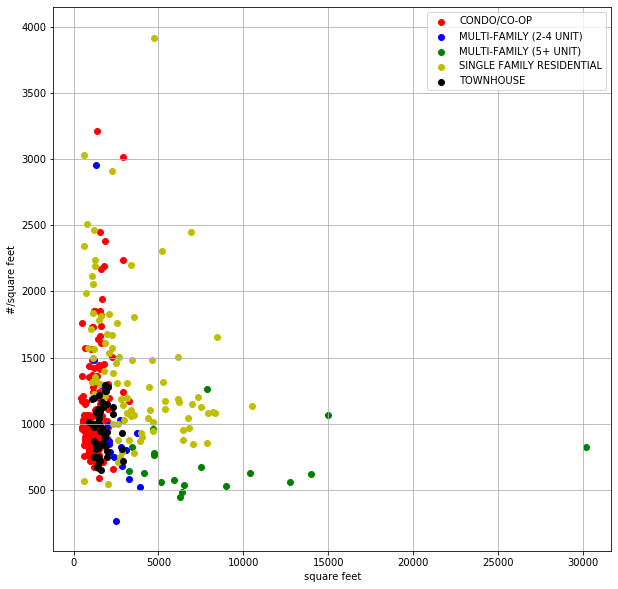

In [30]:
count=0
colors = ['r','b','g','y','k']
for i in property_types:
    
    property_c = XY[:, PTINDEX] == i
    sf = XY[property_c][:, SFINDEX]
    dsf = XY[property_c][:, DSFINDEX]
    
    plt.scatter(sf, 
                dsf, 
                color = colors[count], 
                label = property_types[count].upper(), 
                marker="o")
    count+=1

plt.legend()
plt.grid()
plt.xlabel("square feet")
plt.ylabel("#/square feet")
plt.gcf().set_size_inches(10,10)

Let's delete some extreme houses

In [31]:
XY_new = XY[XY[:,0].argsort()][:-1]
# XY[:,0] sort by first column (square feet)
# .argsort() -> sort
# [:-1] -> remove last element after sort

XY_new = XY_new[XY_new[:,1].argsort()][:-1]

XY_new

array([[2476.0, 268.0, 'Multi-Family (2-4 Unit)'],
       [6243.0, 448.0, 'Multi-Family (5+ Unit)'],
       [6414.0, 483.0, 'Multi-Family (5+ Unit)'],
       ...,
       [2900.0, 3017.0, 'Condo/Co-op'],
       [610.0, 3031.0, 'Single Family Residential'],
       [1400.0, 3214.0, 'Condo/Co-op']], dtype=object)

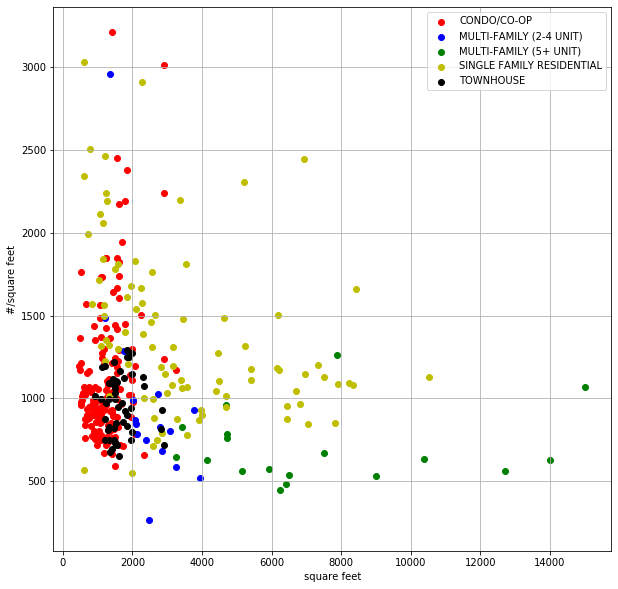

In [32]:
count=0
colors = ['r','b','g','y','k']
for i in property_types:
    
    property_c = XY_new[:, PTINDEX] == i
    sf = XY_new[property_c][:, SFINDEX]
    dsf = XY_new[property_c][:, DSFINDEX]
    
    plt.scatter(sf, 
                dsf, 
                color = colors[count], 
                label = property_types[count].upper(), 
                marker = "o")
    count+=1

plt.legend()
plt.grid()
plt.xlabel("square feet")
plt.ylabel("#/square feet")
plt.gcf().set_size_inches(10,10)

Now let's just elminilate all too expensive and too big properties

In [36]:
df_b=df_a.loc[(df_a['square feet'] < 6000) & (df_a['$/square feet'] <= 2500)]
XY = np.array(df_b[["square feet", "$/square feet","property type"]])

In [37]:
category = [0,1,2,3,0]
property_type_column = np.array(df_b["property type"]).tolist()
property_type_column
Y = np.array([category[property_types.index(value)] for value in property_type_column])

labels = ["Condo/Townhouse", "Multi-Family (2-4 Unit)", "Multi-Family (5+ Unit)", "Single Family"]
XY = np.array(df_b[["square feet", "$/square feet"]])

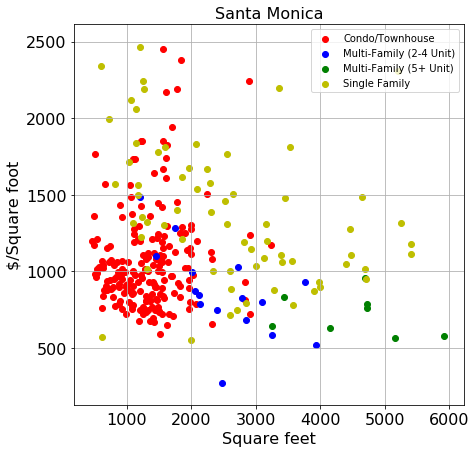

In [39]:
colors=["r","b","g","y"]
for i in range(4):
    sf = XY[Y == i][:,SFINDEX]
    dsf = XY[Y == i][:,DSFINDEX]
    plt.scatter(sf, 
                dsf,         
                color = colors[i],
                label = labels[i],
                marker = "o")
plt.legend()
plt.grid()
plt.xlabel("Square feet", fontsize=16)
plt.ylabel("$/Square foot", fontsize=16)
plt.gca().tick_params(which="both",labelsize=16)
plt.title("Santa Monica", fontsize=16)
plt.gcf().set_size_inches(7,7)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split as tss
from sklearn.metrics import accuracy_score, confusion_matrix

In [68]:
KNN = KNeighborsClassifier(n_neighbors=3)
x_train, x_test, y_train, y_test = tss(XY, Y)
model = KNN.fit(x_train, y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test, y_predict)

0.7567567567567568

In [69]:
confusion_matrix(ytest, ypredict)

array([[48,  1,  0,  1],
       [ 2,  0,  0,  3],
       [ 0,  0,  2,  1],
       [ 7,  0,  1,  8]], dtype=int64)

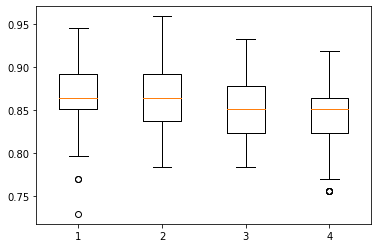

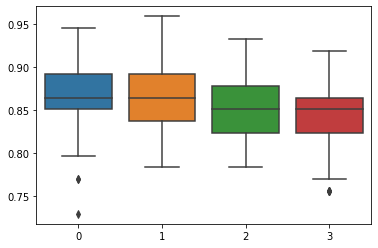

In [102]:
def evaluate_model(X, Y, method, repeats):
    accs=[]
    for repeat in range(repeats):
        x_train, x_test, y_train, y_test = tss(XY, Y)
        method.fit(X,Y)
        y_predict = method.predict(x_test)
        accs.append(accuracy_score(y_test, y_predict))
    return(accs)


stats3 = evaluate_model(XY,Y,KNeighborsClassifier(n_neighbors=3),100)
stats4 = evaluate_model(XY,Y,KNeighborsClassifier(n_neighbors=4),100)
stats5 = evaluate_model(XY,Y,KNeighborsClassifier(n_neighbors=5),100)
stats6 = evaluate_model(XY,Y,KNeighborsClassifier(n_neighbors=6),100)

import seaborn as sns

# sns to plt boxplots
plt.boxplot([stats3,stats4,stats5,stats6])
plt.show()
fig,ax=plt.subplots()
sns.boxplot(data=[stats3,stats4,stats5,stats6])
plt.show()

### Naive Bayes

GNB: 0.7972972972972973
LDA: 0.7567567567567568
QDA: 0.7837837837837838


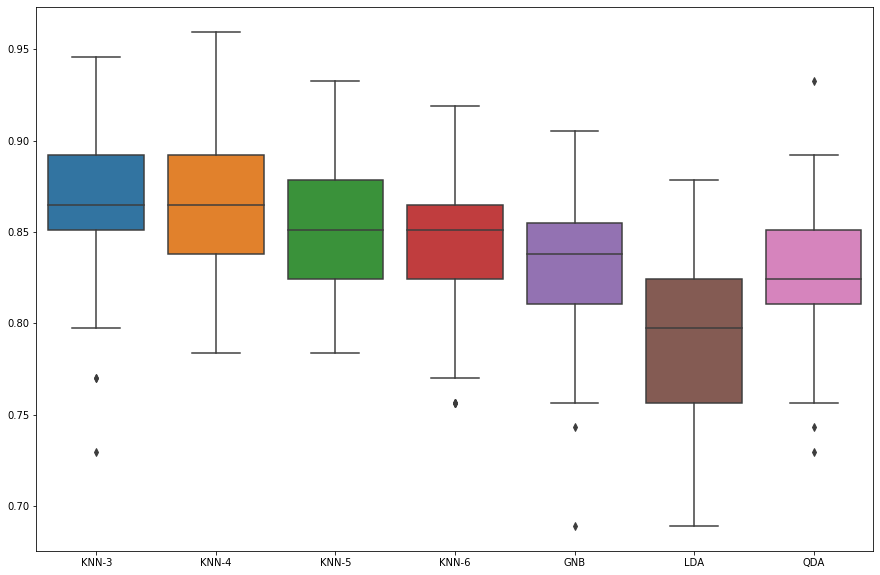

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Gaussian
GNB = GaussianNB()
x_train, x_test, y_train, y_test = tss(XY, Y)
model = GNB.fit(x_train, y_train)
YP = model.predict(x_test)
print("GNB:",accuracy_score(y_test, YP))
GNBSTATS = evaluate_model(XY, Y, GNB, 100)

# Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
model = LDA.fit(x_train,y_train)
YP = model.predict(x_test)
print("LDA:",accuracy_score(y_test, YP))
LDASTATS = evaluate_model(XY, Y, LDA, 100)

# Quadratic Discriminant Analysis
QDA = QuadraticDiscriminantAnalysis()
model = QDA.fit(x_train, y_train)
YP = model.predict(x_test)
print("QDA:",accuracy_score(y_test, YP))
QDASTATS = evaluate_model(XY, Y, QDA, 100)

sns.boxplot(data=[stats3,stats4,stats5,stats6, GNBSTATS, LDASTATS, QDASTATS])

plt.xticks([0,1,2,3,4,5,6],["KNN-3","KNN-4","KNN-5","KNN-6", "GNB", "LDA", "QDA"]);
plt.gcf().set_size_inches(15,10)
plt.show()

### Install GSML and plot decision boundary. 
### Compare  probabilistic models


In [ ]:
import GSML

# Analysis methods: 
KNeighborsClassifier(n_neighbors=5)
GNG
LDA
QDA

fig,ax=plt.subplots()
GSML.ShowCategories(ax, XY, Y, """analysis method""", nsteps=150,
   colors=["r", "g","b"])
ax.set_xlabel("Area",fontsize=16)
ax.set_ylabel("Price/Sq Foot",fontsize=16)
ax.tick_params(which="both",labelsize=16)
ax.grid()
ax.set_title("""analysis method""",fontsize=18)
fig.set_size_inches(10,6)
